In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal
from glob import glob
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import get_body, SkyCoord, AltAz, EarthLocation, Angle

In [3]:
oldpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/'
newpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/'

In [4]:
ls /lustre/aoc/projects/hera/plaplant/HERA19Golden/

Autos/           ImagedData/       kohn18_paper/  Simulation/
CalibratedData/  kohn18_analysis/  RawData/       test/


In [8]:
uvd1 = UVData()
uvd2 = UVData()

In [123]:
uvd1.read(newpath+'RawData/2457548/zen.2457548.64018.uvcRP.uvh5')
uvd2.read(newpath+'RawData/2457549/zen.2457549.64017.uvcRP.uvh5')

In [45]:
((0.64018-0.64017)*u.day).to(u.s)

<Quantity 0.864 s>

In [24]:
uvd1.Ntimes

56

In [124]:
jd1 = np.unique(uvd1.time_array)
jd2 = np.unique(uvd2.time_array)

In [38]:
lst1 = np.unique(uvd1.lst_array)
lst2 = np.unique(uvd2.lst_array)

In [ ]:
lst1*24./(2.*np.pi)

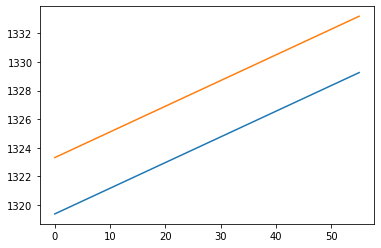

In [48]:
plt.plot((lst1*24./(2.*np.pi)*u.hr).to(u.minute))
plt.plot((lst2*24./(2.*np.pi)*u.hr).to(u.minute))

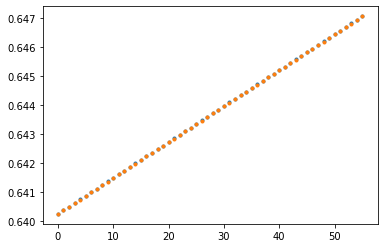

In [30]:
plt.plot(jd1-2457548,'.')
plt.plot(jd2-2457549,'.')
#plt.xlim([4000,4500])
#plt.ylim([0.6425,0.6435])

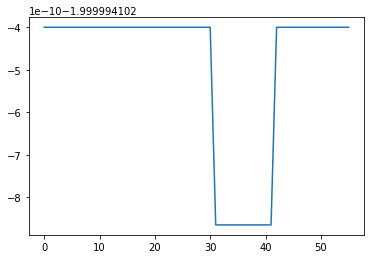

In [33]:
plt.plot(jd1 - jd2 - 1)

In [35]:
jd1 - jd2 + 1

array([5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89713454e-06,
       5.89713454e-06, 5.89713454e-06, 5.89713454e-06, 5.89713454e-06,
       5.89713454e-06, 5.89713454e-06, 5.89713454e-06, 5.89713454e-06,
       5.89713454e-06, 5.89713454e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06,
       5.89760020e-06, 5.89760020e-06, 5.89760020e-06, 5.89760020e-06])

In [36]:
5.89760020e-06 * 15.

0.50955265728

In [37]:
(5.89760020e-06*u.day).to(u.s)

<Quantity 0.50955266 s>

In [53]:
antpos, ants = uvd1.get_ENU_antpos(center=True, pick_data_ants=True)

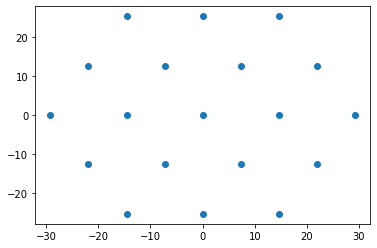

In [54]:
plt.plot(antpos[:,0], antpos[:,1],'o')

In [61]:
uvd1.uvw_array.shape

(10640, 3)

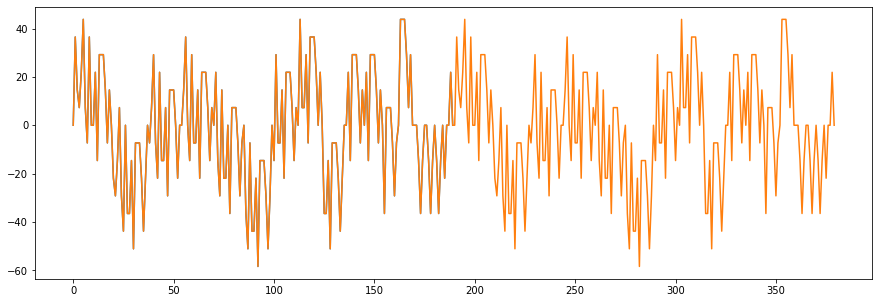

In [70]:
plt.figure(figsize=(15,5))
plt.plot(uvd1.uvw_array[0:190,0])
plt.plot(uvd1.uvw_array[0:190+190,0])

In [101]:
uvd1.phase_type

'drift'

In [102]:
uvws_drift = np.reshape(uvd1.uvw_array.copy(), [uvd1.Ntimes, uvd1.Nbls, 3])

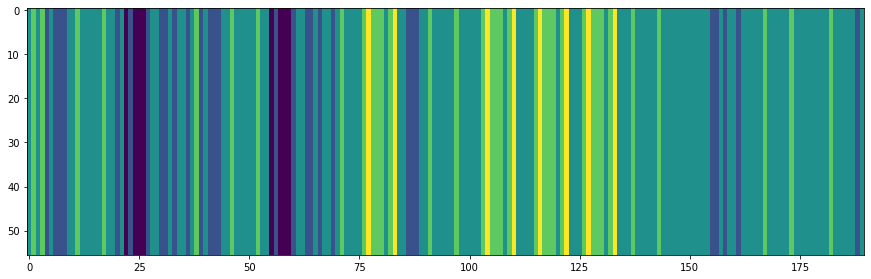

In [103]:
plt.figure(figsize=(15,5))
plt.imshow(uvws_drift[:,:,2])

In [104]:
uvd1.phase_to_time(jd1.mean())

In [105]:
uvd1.phase_type

'phased'

In [106]:
uvws_phased = np.reshape(uvd1.uvw_array.copy(), [uvd1.Ntimes, uvd1.Nbls, 3])

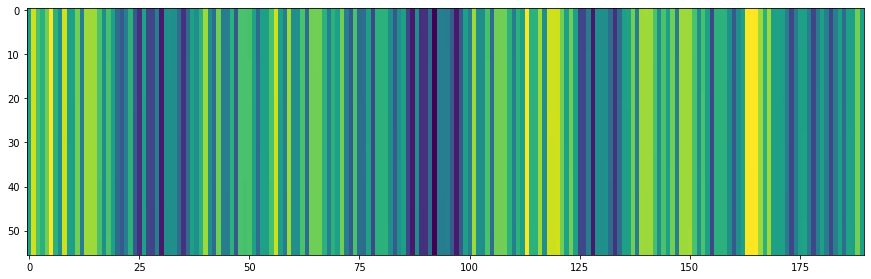

In [107]:
plt.figure(figsize=(15,5))
plt.imshow(uvws_phased[:,:,0])

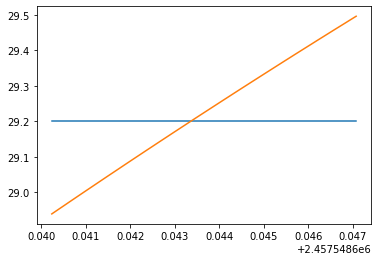

In [110]:
plt.plot(jd1,uvws_drift[:,15,0])
plt.plot(jd1,uvws_phased[:,15,0])

In [113]:
uvd1.write_uvfits('uvd.uvfits', spoof_nonessential=True)

In [114]:
pwd

'/lustre/aoc/projects/hera/jaguirre/gitrepos/plimpy/ModernizeHERA19'

In [115]:
uvd_t0 = uvd1.select?

In [125]:
jd

2457548.640241171

In [141]:
for jd in jd1:
    jdstr = '{:.5f}'.format(jd)
    print(jdstr)
    uvd_t = uvd1.select(time_range=[jd - 1e-5, jd + 1e-5] , inplace=False)
    uvd_t.phase_to_time(jd)
    uvd_t.write_uvfits(str(jdstr)+'.uvfits', spoof_nonessential=True)

2457548.64024
2457548.64037
2457548.64049
2457548.64061
2457548.64074
2457548.64086
2457548.64099
2457548.64111
2457548.64124
2457548.64136
2457548.64148
2457548.64161
2457548.64173
2457548.64186
2457548.64198
2457548.64211
2457548.64223
2457548.64235
2457548.64248
2457548.64260
2457548.64273
2457548.64285
2457548.64298
2457548.64310
2457548.64322
2457548.64335
2457548.64347
2457548.64360
2457548.64372
2457548.64385
2457548.64397
2457548.64409
2457548.64422
2457548.64434
2457548.64447
2457548.64459
2457548.64472
2457548.64484
2457548.64496
2457548.64509
2457548.64521
2457548.64534
2457548.64546
2457548.64559
2457548.64571
2457548.64583
2457548.64596
2457548.64608
2457548.64621
2457548.64633
2457548.64645
2457548.64658
2457548.64670
2457548.64683
2457548.64695
2457548.64708


In [137]:
uvd1.select?

In [131]:
uvd1.select?